In [1]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

## Simple RNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(10000, 32, input_length=200),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.5466 - loss: 0.6825 - val_accuracy: 0.7776 - val_loss: 0.5011
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8153 - loss: 0.4282 - val_accuracy: 0.7804 - val_loss: 0.4793
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8965 - loss: 0.2731 - val_accuracy: 0.7874 - val_loss: 0.4871
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9678 - loss: 0.1069 - val_accuracy: 0.7836 - val_loss: 0.5739
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9891 - loss: 0.0446 - val_accuracy: 0.7886 - val_loss: 0.6616


In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7810 - loss: 0.6720
Test Accuracy: 0.79


##Enhanced Model

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [21]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 166ms/step - accuracy: 0.6862 - loss: 0.5641 - val_accuracy: 0.7264 - val_loss: 0.4982
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.9073 - loss: 0.2362 - val_accuracy: 0.8654 - val_loss: 0.3156
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.9465 - loss: 0.1471 - val_accuracy: 0.8362 - val_loss: 0.4146
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.9599 - loss: 0.1105 - val_accuracy: 0.7524 - val_loss: 0.7112
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 162ms/step - accuracy: 0.9702 - loss: 0.0852 - val_accuracy: 0.8588 - val_loss: 0.5680


782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12500
           1       0.87      0.81      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



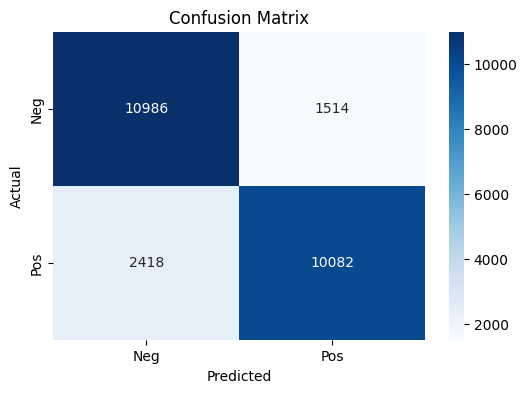

In [22]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

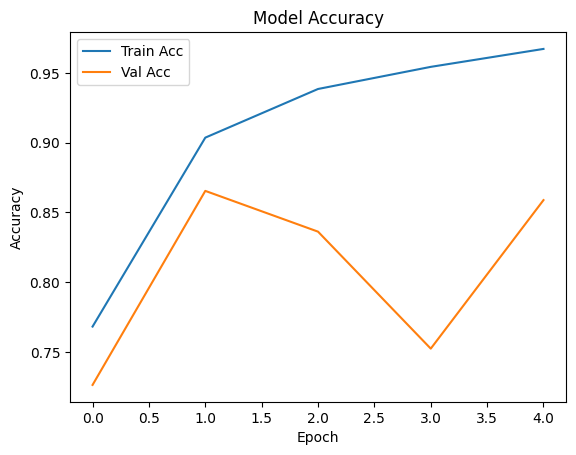

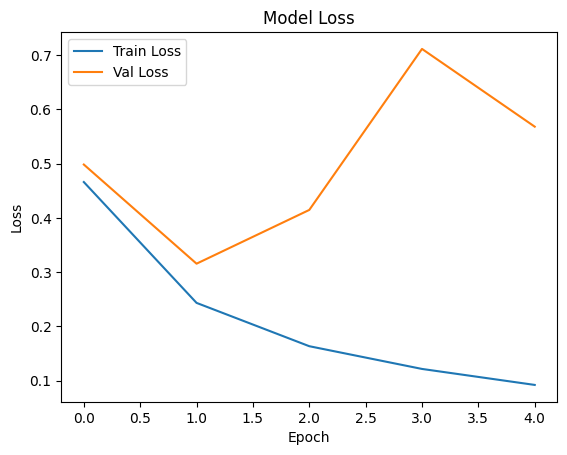

In [23]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Continued training for 2 more epochs
history2 = model.fit(
    x_train, y_train,
    epochs=7,
    initial_epoch=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 6/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - accuracy: 0.9802 - loss: 0.0536 - val_accuracy: 0.7932 - val_loss: 0.7655
Epoch 7/7
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 168ms/step - accuracy: 0.9672 - loss: 0.0867 - val_accuracy: 0.8256 - val_loss: 0.6088


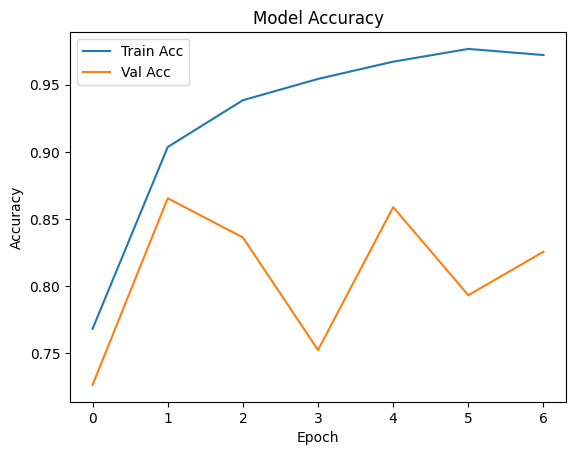

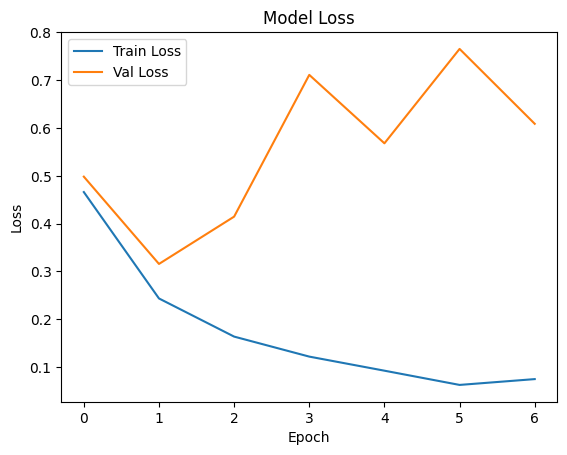

In [32]:
full_acc = history.history['accuracy'] + history2.history['accuracy']
full_val_acc = history.history['val_accuracy'] + history2.history['val_accuracy']
full_loss = history.history['loss'] + history2.history['loss']
full_val_loss = history.history['val_loss'] + history2.history['val_loss']

# Accuracy
plt.plot(full_acc, label='Train Acc')
plt.plot(full_val_acc, label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(full_loss, label='Train Loss')
plt.plot(full_val_loss, label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Sample Tests

In [35]:
# Word index used by IMDb
word_index = imdb.get_word_index()

word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Preprocessing custom text
def encode_review(text):
    tokens = text.lower().split()
    encoded = [1]
    for word in tokens:
        encoded.append(word_index.get(word, 2))
    return pad_sequences([encoded], maxlen=max_len)


custom_review = "This movie was terrible and boring"
encoded = encode_review(custom_review)
prediction = model.predict(encoded)[0][0]

sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Review: {custom_review}")
print(f"Predicted Sentiment: {sentiment} ({prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Review: This movie was terrible and boring
Predicted Sentiment: Negative (0.05)


In [36]:
custom_review = "I loved every minute of the film"
encoded = encode_review(custom_review)
prediction = model.predict(encoded)[0][0]

sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Review: {custom_review}")
print(f"Predicted Sentiment: {sentiment} ({prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Review: I loved every minute of the film
Predicted Sentiment: Positive (0.83)


In [37]:
custom_review = "It had no plot and weak acting"
encoded = encode_review(custom_review)
prediction = model.predict(encoded)[0][0]

sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Review: {custom_review}")
print(f"Predicted Sentiment: {sentiment} ({prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Review: It had no plot and weak acting
Predicted Sentiment: Negative (0.00)
